link to data - https://drive.google.com/file/d/13rs90eweXrRSDjN1EgUHokIt9dDlhPvo/view?usp=sharing

# Problem Statement

The online payment platform processes a high volume of transactions daily, making it susceptible to various types of fraudulent activities. These activities pose a significant threat to both the business and customers, necessitating a proactive approach to fraud detection and prevention. The goal of this project is to leverage data science and machine learning techniques to develop advanced predictive models for identifying potentially fraudulent transactions. By doing so, we aim to enhance the security and trustworthiness of the platform, protect the users from fraudulent activities and ensure a seamless and secure online payment experience.

# Objectives

- Fraud Detection Model: An advanced machine learning model to predict whether a given transaction is potentially fraudulent or not. This model will be vital for real-time decision-making, allowing us to flag and investigate suspicious activities promptly.

- Enhanced Security: The primary aim is to enhance the security of our platform. By identifying fraudulent transactions early, we can take preventive measures to protect our customers and our business from financial losses.

- User Trust: Fraud detection directly impacts the trust our customers have in our platform. Accurate and efficient detection of fraudulent activities assures our users that their transactions are safe and secure.

- Operational Efficiency: Implementing automated fraud detection reduces the manual effort required for monitoring transactions, allowing our business to operate more efficiently.

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
import geopandas as gpd

# Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Importing Data

In [3]:
file_path = '/content/drive/MyDrive/datafest_hackathon/Copy of Fraud Detection Dataset.csv'

In [4]:
df = pd.read_csv(file_path)

# Exploratory Data Analysis

- In the exploratory data analysis section, we aim to uncover valuable insights from our dataset through various means. First, we begin by gathering fundamental information about the data, including its shape, data types, the extent of missing values, and key statistical measures such as mean, median, maximum, and minimum values.

- Following this initial exploration, we utilize Pandas' value_counts method to examine the distribution of items within specific columns, particularly categorical ones like the "fraudulent flag" and "user gender."

- To enhance our understanding of the data, we harness the power of Matplotlib and Seaborn libraries to create visualizations. These visualization plots play a crucial role in transforming complex numerical data into interpretable patterns and trends, making it easier for us to derive meaningful insights. After all, visual representations are often more intuitive and insightful than raw numbers, as they allow us to grasp information at a glance.

# Wearing my programming hat 🧢 😇  for more deeper exploration and to obtain insights ⚡⚡⚡

I am going to be leading you with some questions, sit back and enjoy the amazing reports



In [5]:
#cheking first three rows
df.head(3)

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,Links,Tizen,Industrial & Scientific,68,Doctor,66826.21,Prefer Not to Say,Pro,In Transit,9.34,24.22,Daytime,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,Beaker,Windows Server,Beauty & Cosmetics,22,Chemist,89356.71,Genderqueer,Pending Approval,Resolved,65.28,55.11,Daytime,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,Opera,Android,Real Estate,71,Nurse,58438.63,Male,Pro,Posted,44.05,53.84,Daytime,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1


In [6]:
#cheking shape
df.shape

(6000000, 32)

In [7]:
#obtaining data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 32 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Transaction ID                     int64  
 1   User ID                            int64  
 2   Transaction Amount                 float64
 3   Transaction Date and Time          object 
 4   Merchant ID                        int64  
 5   Payment Method                     object 
 6   Country Code                       object 
 7   Transaction Type                   object 
 8   Device Type                        object 
 9   IP Address                         object 
 10  Browser Type                       object 
 11  Operating System                   object 
 12  Merchant Category                  object 
 13  User Age                           int64  
 14  User Occupation                    object 
 15  User Income                        float64
 16  User Gender       

In [8]:
#cheking number of null values in columns
df.isnull().sum()


Transaction ID                       0
User ID                              0
Transaction Amount                   0
Transaction Date and Time            0
Merchant ID                          0
Payment Method                       0
Country Code                         0
Transaction Type                     0
Device Type                          0
IP Address                           0
Browser Type                         0
Operating System                     0
Merchant Category                    0
User Age                             0
User Occupation                      0
User Income                          0
User Gender                          0
User Account Status                  0
Transaction Status                   0
Location Distance                    0
Time Taken for Transaction           0
Transaction Time of Day              0
User's Transaction History           0
Merchant's Reputation Score          0
User's Device Location               0
Transaction Currency     

In [9]:
#obtaining summary statistics
df.describe()

,Transaction ID,User ID,Transaction Amount,Merchant ID,User Age,User Income,Location Distance,Time Taken for Transaction,User's Transaction History,Merchant's Reputation Score,User's Credit Score,Merchant's Business Age,Fraudulent Flag
count,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06
mean,5.501906e+07,5.499571e+03,5.005515e+02,5.500817e+03,4.900159e+01,5.049328e+04,5.050600e+01,3.049492e+01,5.048393e+01,2.999382e+00,5.749533e+02,1.049685e+01,4.999843e-01
std,2.598067e+07,2.598744e+03,2.884166e+02,2.598350e+03,1.818538e+01,2.858223e+04,2.857562e+01,1.703567e+01,2.886705e+01,1.154479e+00,1.590197e+02,5.764884e+00,5.000000e-01
min,1.000004e+07,1.000000e+03,1.000000e+00,1.000000e+03,1.800000e+01,1.000020e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+02,1.000000e+00,0.000000e+00
25%,3.251666e+07,3.248000e+03,2.507900e+02,3.251000e+03,3.300000e+01,2.573446e+04,2.576000e+01,1.574000e+01,2.500000e+01,2.000000e+00,4.370000e+02,5.000000e+00,0.000000e+00
50%,5.502987e+07,5.499000e+03,5.005100e+02,5.501000e+03,4.900000e+01,5.050294e+04,5.051000e+01,3.050000e+01,5.000000e+01,3.000000e+00,5.750000e+02,1.000000e+01,0.000000e+00
75%,7.752487e+07,7.751000e+03,7.504400e+02,7.752000e+03,6.500000e+01,7.523454e+04,7.525000e+01,4.526000e+01,7.500000e+01,4.000000e+00,7.130000e+02,1.500000e+01,1.000000e+00
max,9.999988e+07,9.999000e+03,1.000000e+03,9.999000e+03,8.000000e+01,1.000000e+05,1.000000e+02,6.000000e+01,1.000000e+02,5.000000e+00,8.500000e+02,2.000000e+01,1.000000e+00


In [10]:
#checking total counts of items
print(f'Number of unique merchant ids is {df["Merchant ID"].nunique()}')
print(f'Number of unique user ids is {df["User ID"].nunique()}')


Number of unique merchant ids is 9000
Number of unique user ids is 9000


In [11]:
#checking the average transaction amount for genders
df.groupby('User Gender')['Transaction Amount'].mean()

User Gender
Agender              500.666235
Female               500.573196
Genderqueer          500.344055
Male                 500.437704
Non-Binary           500.558022
Other                500.651042
Prefer Not to Say    500.630820
Name: Transaction Amount, dtype: float64

In [12]:
#checking the average merchant reputation score based on fraudulent flag
df.groupby('Fraudulent Flag')["Merchant's Reputation Score"].mean()

Fraudulent Flag
0    2.999011
1    2.999754
Name: Merchant's Reputation Score, dtype: float64

In [13]:
#obtaining the number of occurences in the fradulent flag column
df['Fraudulent Flag'].value_counts()

0    3000094
1    2999906
Name: Fraudulent Flag, dtype: int64

In [14]:
#obtaining a dataframe showing the counts of items for the non-numeric columns
object_columns = df.select_dtypes('object')
unique_counts = object_columns.nunique()
unique_dataframe = pd.DataFrame({'Columns with unique items': unique_counts.index, 'Count': unique_counts.values})
unique_dataframe

,Columns with unique items,Count
0,Transaction Date and Time,5783314
1,Payment Method,40
2,Country Code,40
3,Transaction Type,38
4,Device Type,38
5,IP Address,5995699
6,Browser Type,39
7,Operating System,40
8,Merchant Category,40
9,User Occupation,26


In [5]:
df["Transaction Date and Time"] = pd.to_datetime(df["Transaction Date and Time"])

In [6]:
#Extracting date related features
df['date'] = df["Transaction Date and Time"].dt.date
df['year'] = df["Transaction Date and Time"].dt.year
df['month'] = df["Transaction Date and Time"].dt.month
df['day'] = df["Transaction Date and Time"].dt.day
df['hour'] = df["Transaction Date and Time"].dt.hour
df['minute'] = df["Transaction Date and Time"].dt.minute
df['day_of_week'] = df["Transaction Date and Time"].dt.dayofweek  # Monday=0, Sunday=6
df['day_of_year'] = df["Transaction Date and Time"].dt.dayofyear
df['is_weekend'] = (df["Transaction Date and Time"].dt.dayofweek >= 5).astype(int)

# Data Visualization

<Axes: xlabel='Transaction Time of Day', ylabel='count'>

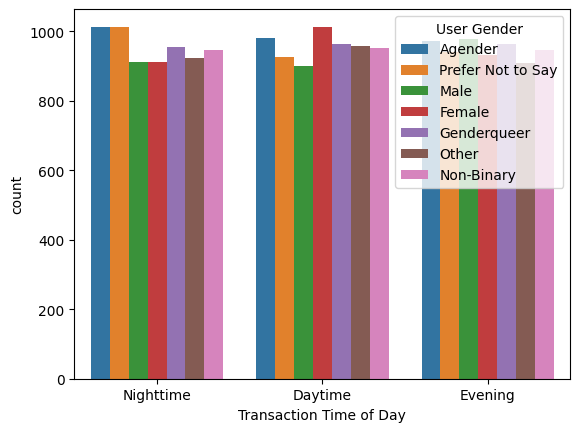

In [17]:
sns.countplot(x = 'Transaction Time of Day', hue = 'User Gender', data=df.sample(20000))

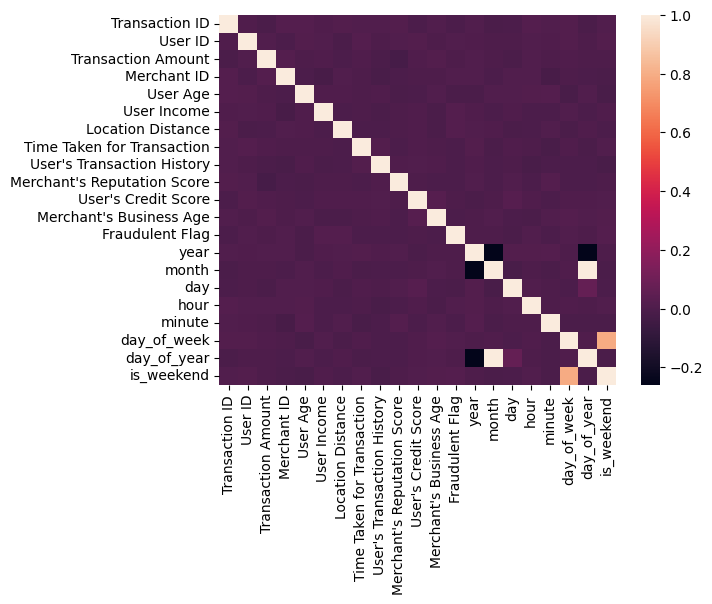

In [18]:
sns.heatmap(df.sample(10000).corr());

--------------------------------------NEXT----------------------------------------


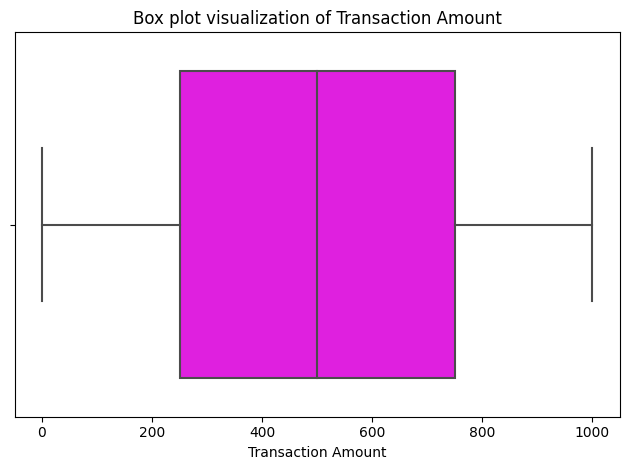

--------------------------------------NEXT----------------------------------------


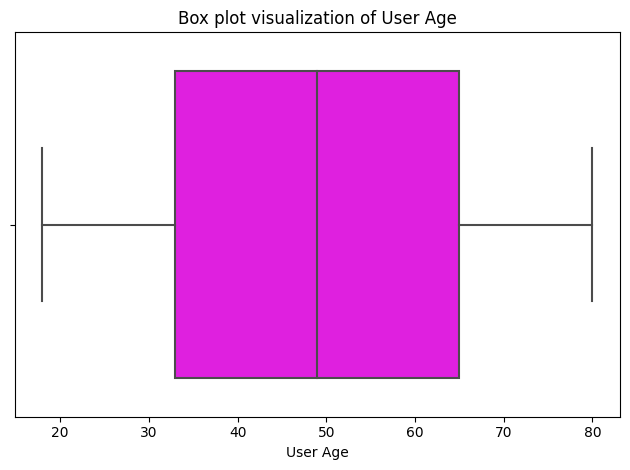

--------------------------------------NEXT----------------------------------------


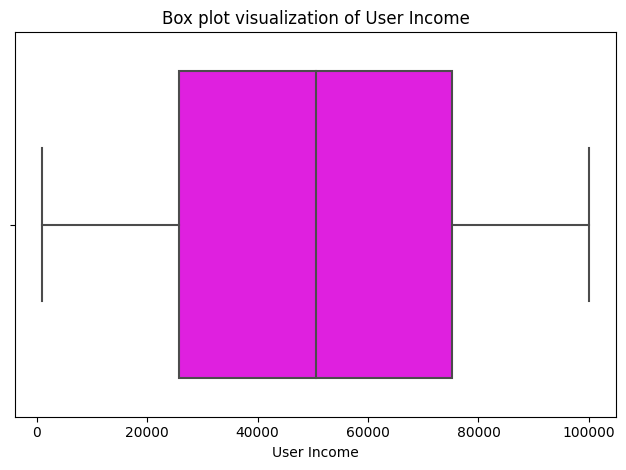

--------------------------------------NEXT----------------------------------------


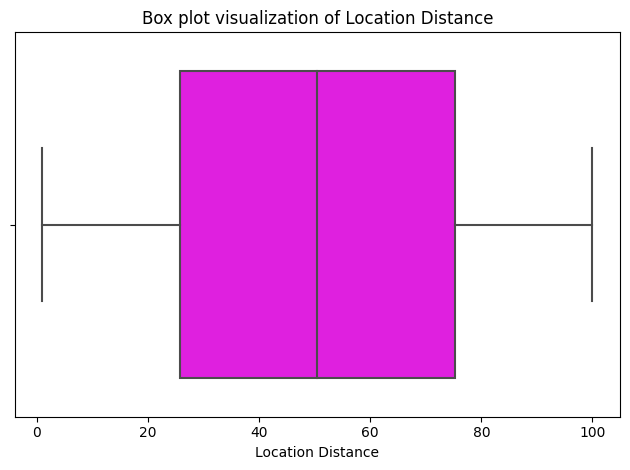

--------------------------------------NEXT----------------------------------------


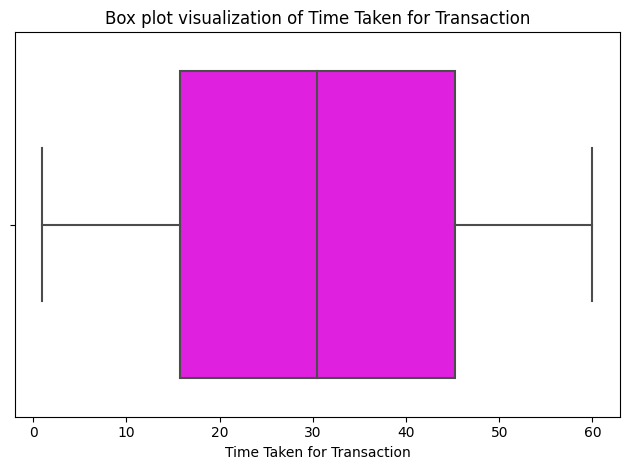

--------------------------------------NEXT----------------------------------------


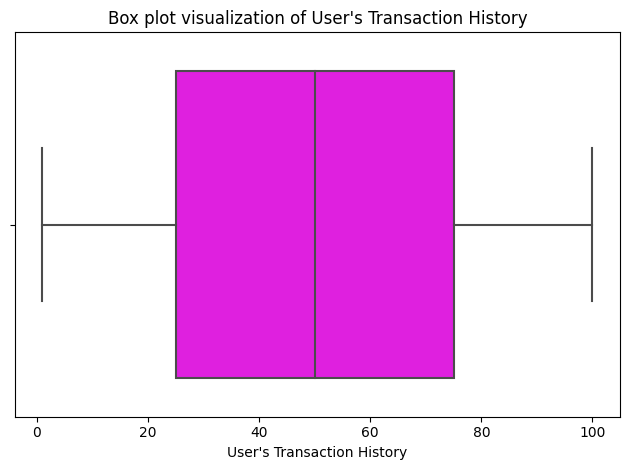

--------------------------------------NEXT----------------------------------------


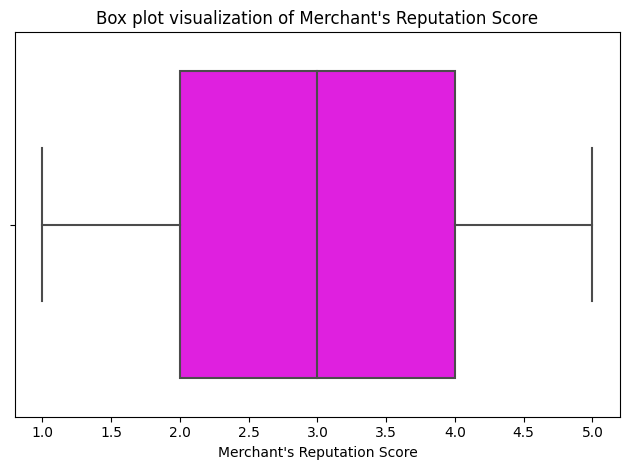

--------------------------------------NEXT----------------------------------------


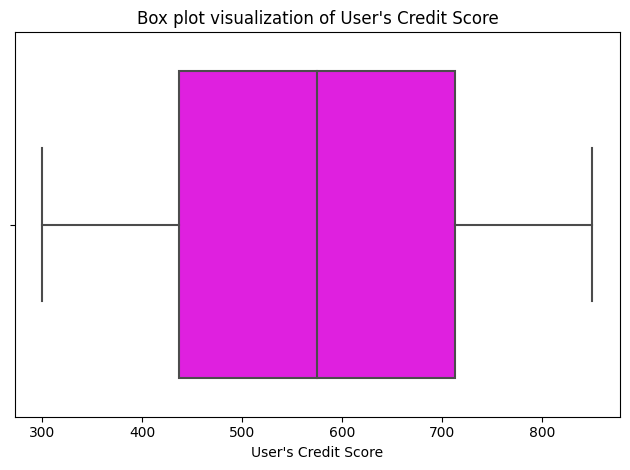

--------------------------------------NEXT----------------------------------------


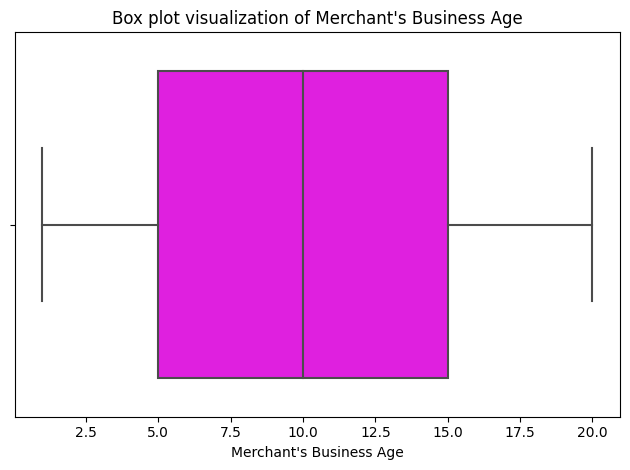

In [19]:
col_to_check = ["Transaction Amount",	"User Age"	,"User Income",	"Location Distance", "Time Taken for Transaction",	"User's Transaction History"	,"Merchant's Reputation Score"	,"User's Credit Score"	,"Merchant's Business Age"]
for col in col_to_check:
  plt.title(f'Box plot visualization of {col}')
  sns.boxplot(x = col, data = df,color = 'magenta')
  print('--------------------------------------NEXT----------------------------------------')
  plt.tight_layout()
  plt.show()



Text(0.5, 1.0, 'Violin Plot for Users Credit Score')

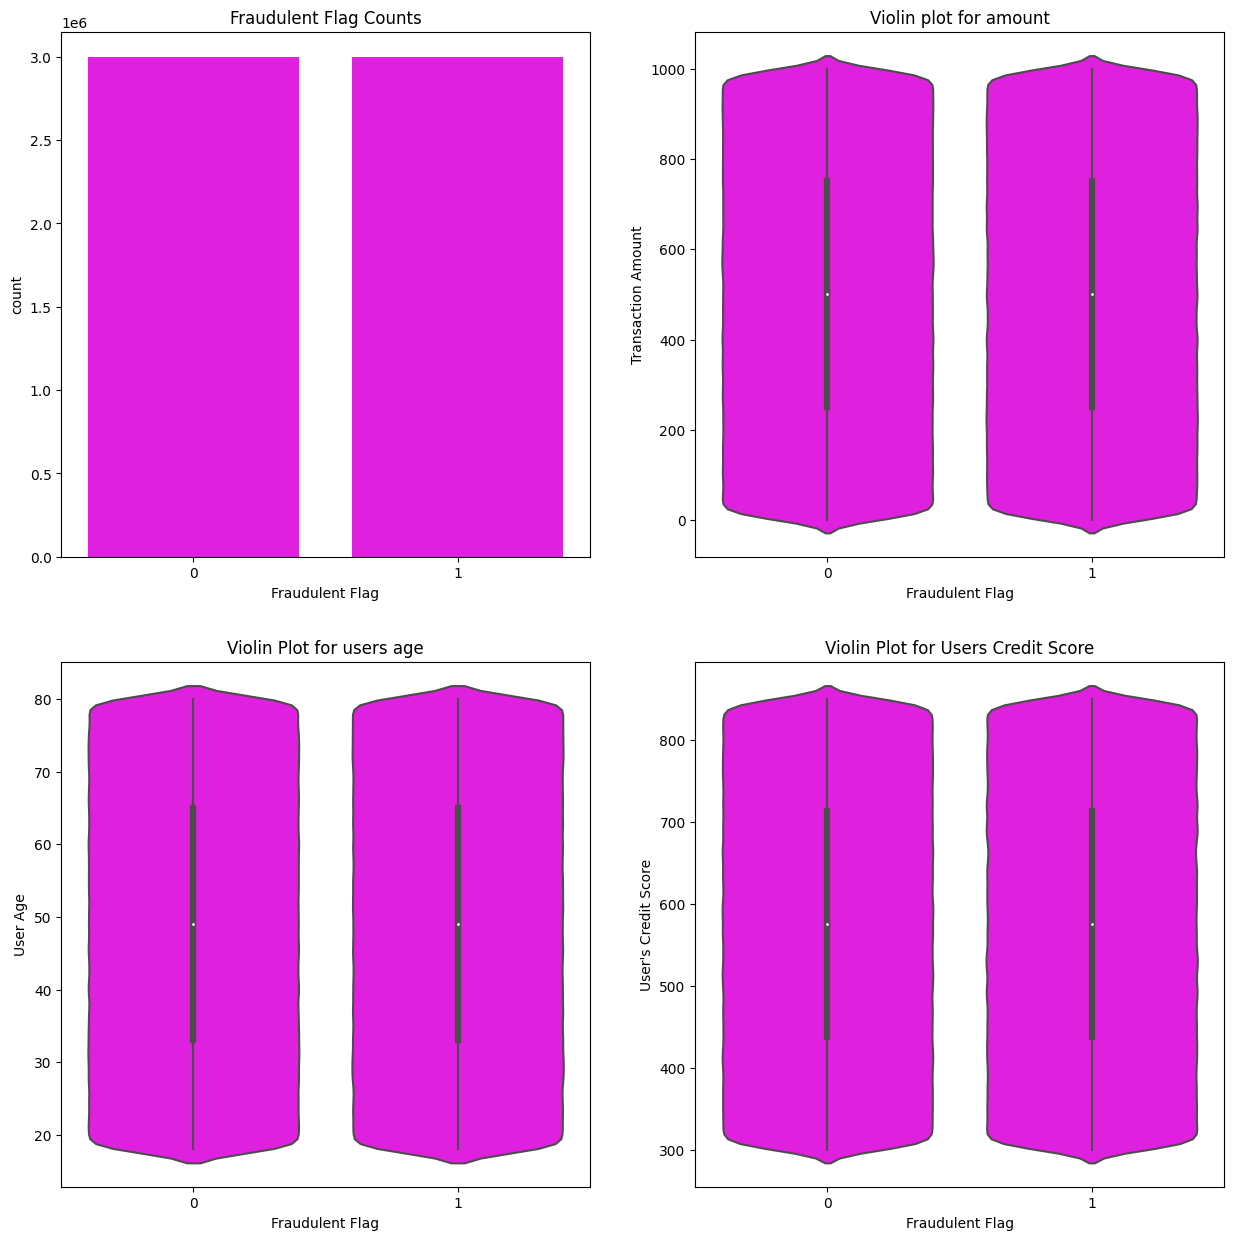

In [20]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
sns.countplot(x='Fraudulent Flag', data = df,ax=ax[0][0],color = 'magenta').set_title('Fraudulent Flag Counts',size=12)
sns.violinplot(x='Fraudulent Flag', data = df,y= 'Transaction Amount',ax=ax[0][1],color = 'magenta').set_title('Violin plot for amount',size=12)
sns.violinplot(x='Fraudulent Flag', data = df,y= 'User Age',ax=ax[1][0],color = 'magenta').set_title('Violin Plot for users age',size=12)
sns.violinplot(x='Fraudulent Flag', data = df,y= "User's Credit Score",ax=ax[1][1],color = 'magenta').set_title('Violin Plot for Users Credit Score',size=12)


Question 1 : What are the top 5 users with the highest transaction amount ?

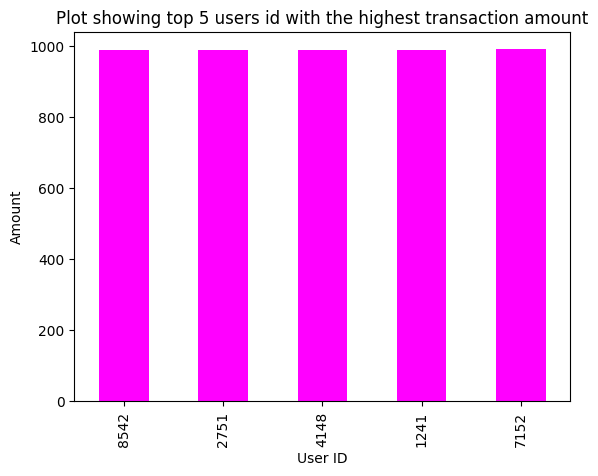

In [21]:
df.groupby('User ID')['Transaction Amount'].max().sort_values().head(5).plot(kind = 'bar',color = 'magenta')
plt.ylabel('Amount')
plt.title('Plot showing top 5 users id with the highest transaction amount')
plt.show()

In [22]:
print(f"The top five users with the highest transaction amount are : {df.groupby('User ID')['Transaction Amount'].max().sort_values().head(5).index.to_list()}")

The top five users with the highest transaction amount are : [8542, 2751, 4148, 1241, 7152]


It appears that the top users with highest transaction amount spend about 1000

Question 2 : What are the top 5 users with the average amount ?

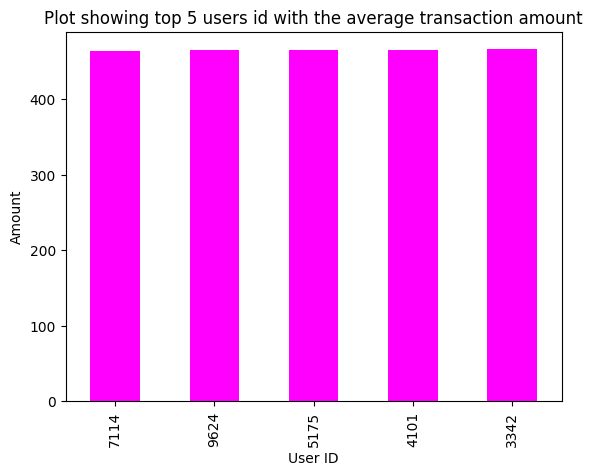

In [23]:
df.groupby('User ID')['Transaction Amount'].mean().sort_values().head(5).plot(kind = 'bar',color = 'magenta')
plt.ylabel('Amount')
plt.title('Plot showing top 5 users id with the average transaction amount')
plt.show()

This also shows that the mean average amount was very similar for the top 5 user ids

Question 3: What is the fraction of fraudulence and non-fraudulence in the data?

In [24]:
#obtaining the number of occurences in the fradulent flag column in terms of percentage
df['Fraudulent Flag'].value_counts(normalize = True)

0    0.500016
1    0.499984
Name: Fraudulent Flag, dtype: float64

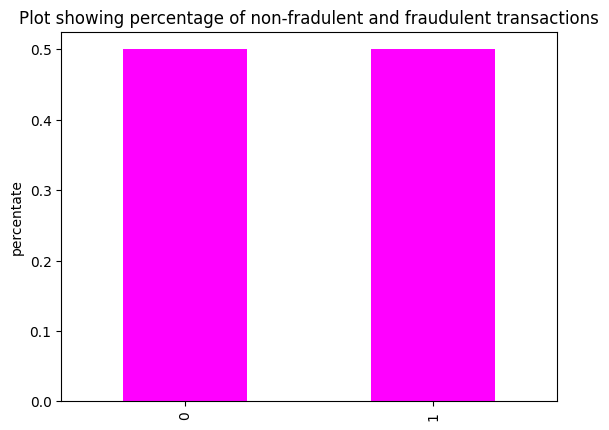

In [25]:
sns.diverging_palette(145, 300, s=60, as_cmap=True)
df['Fraudulent Flag'].value_counts(normalize = True).plot(kind = 'bar', color = 'magenta')
plt.ylabel('percentate')
plt.title('Plot showing percentage of non-fradulent and fraudulent transactions')
plt.show()

There is a balance in the ratio or percentage in the classes in the Fraudulent Flag column

Question 4 : Visualize the count of count of fraudulent/non-fraudulent transactions based on time of the day

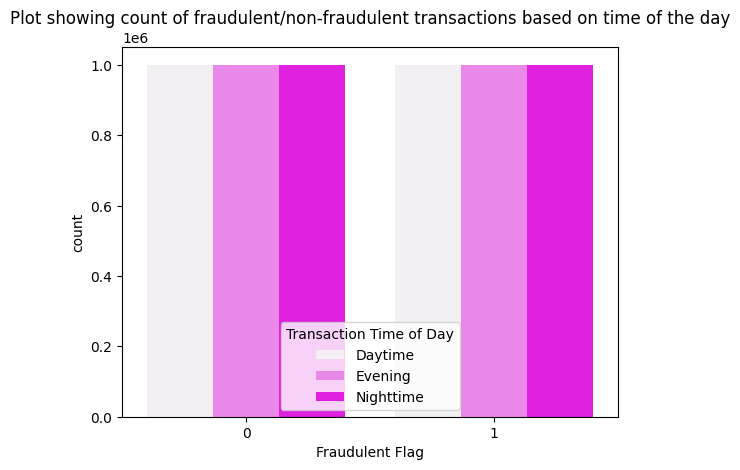

In [26]:
sns.countplot(x = 'Fraudulent Flag', hue = 'Transaction Time of Day', data = df ,color = 'magenta')
plt.ylabel('count')
plt.title('Plot showing count of fraudulent/non-fraudulent transactions based on time of the day')
plt.show()

This also shows that transactions are equally done during daytime, evening and nightime

Question 5 : Visualize the volume of transactions over time(per day)

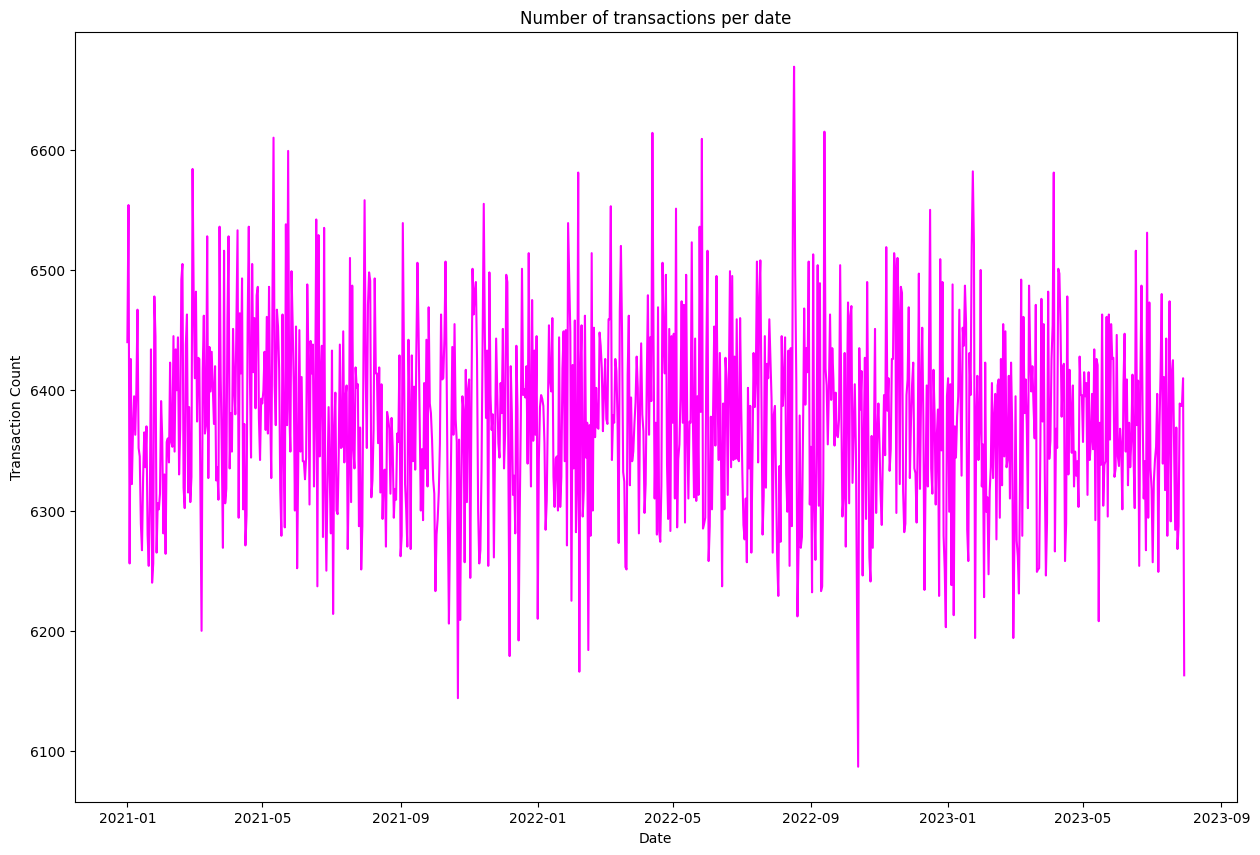

In [10]:
plt.figure(figsize=(15, 10))
number_of_transactions_per_date = df.groupby(df['date'])['Transaction ID'].count().reset_index(name='Transactions')
plt.plot(number_of_transactions_per_date['date'], number_of_transactions_per_date['Transactions'], color='magenta', linestyle='-')
plt.title('Number of transactions per date')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.show()


Looking at the volatility in the plot above, there seem to be a rise and fall in the data per day. Though the differences are not much using the y-axis as a guide.

Question 6 : What time of the month do we have high number of transactions

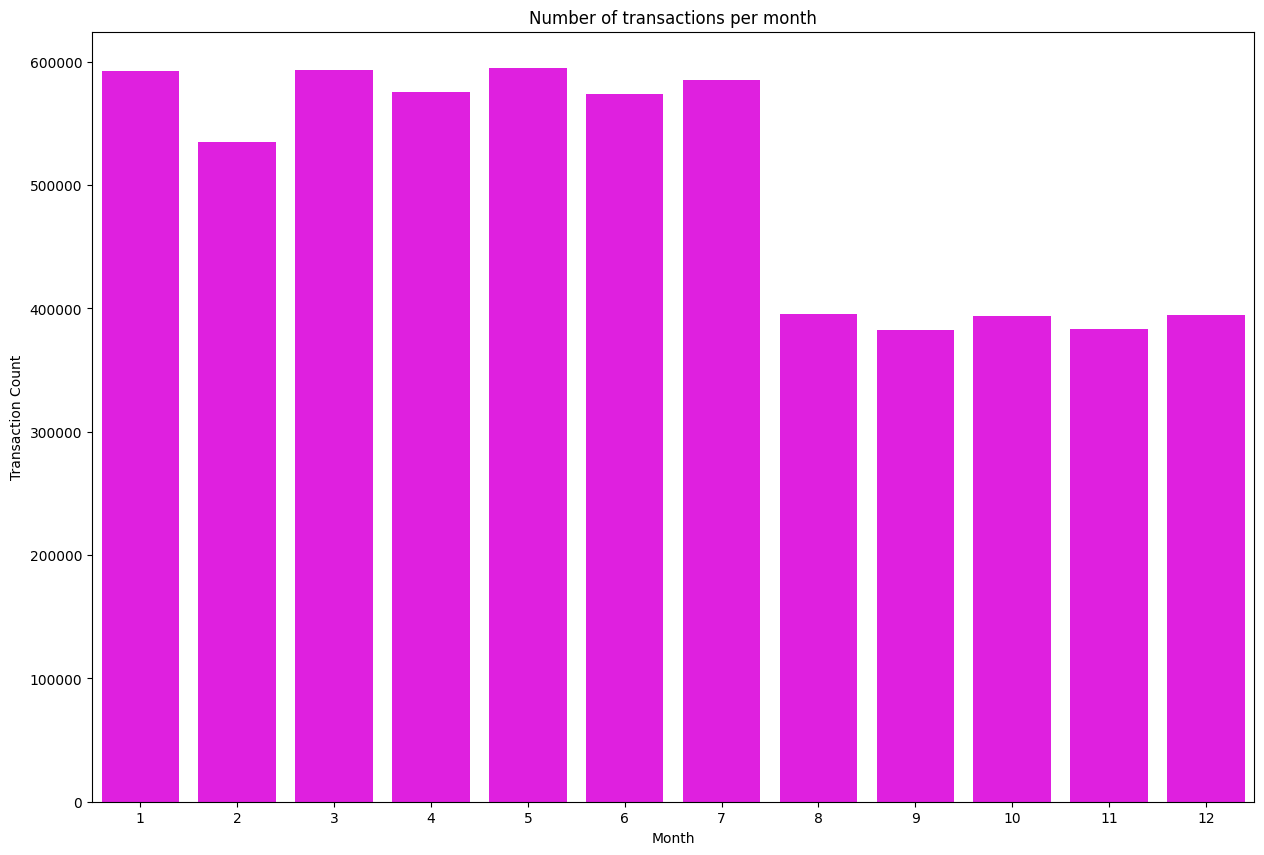

In [7]:
plt.figure(figsize=(15, 10))
number_of_transactions_per_month = df.groupby(df['month'])['Transaction ID'].count().reset_index(name='Transactions')
sns.barplot(data=number_of_transactions_per_month, x='month', y='Transactions', linestyle='-', color = 'magenta')
plt.title('Number of transactions per month')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()


Question 7 : What hour of the day are there likely to be a huge amount of transactions

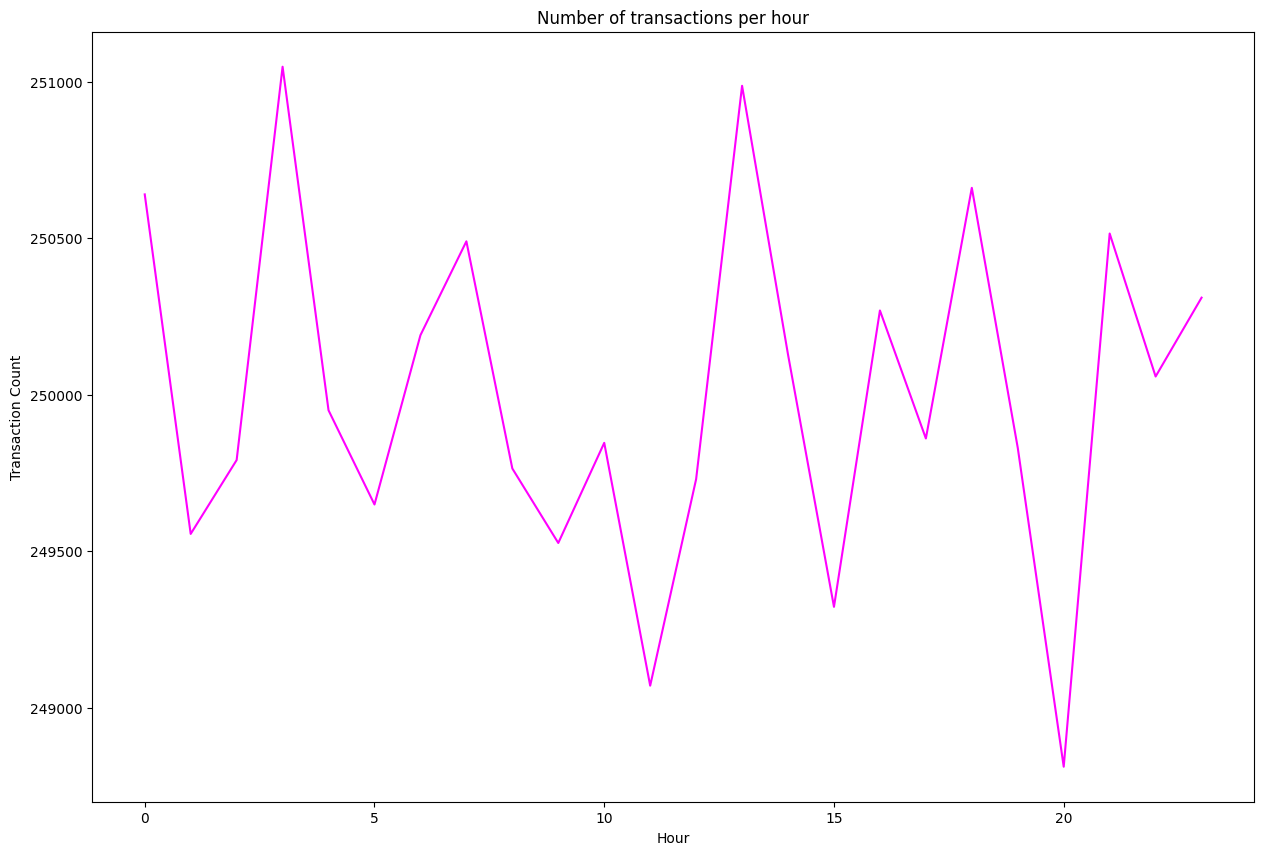

In [8]:
plt.figure(figsize=(15, 10))
number_of_transactions_per_hour = df.groupby(df['hour'])['Transaction ID'].count().reset_index(name='Transactions')
sns.lineplot(data=number_of_transactions_per_hour, x='hour', y='Transactions', linestyle='-', color = 'magenta')
plt.title('Number of transactions per hour')
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.show()


Question 8 : What day of the week are we likely to see a surge in transactions

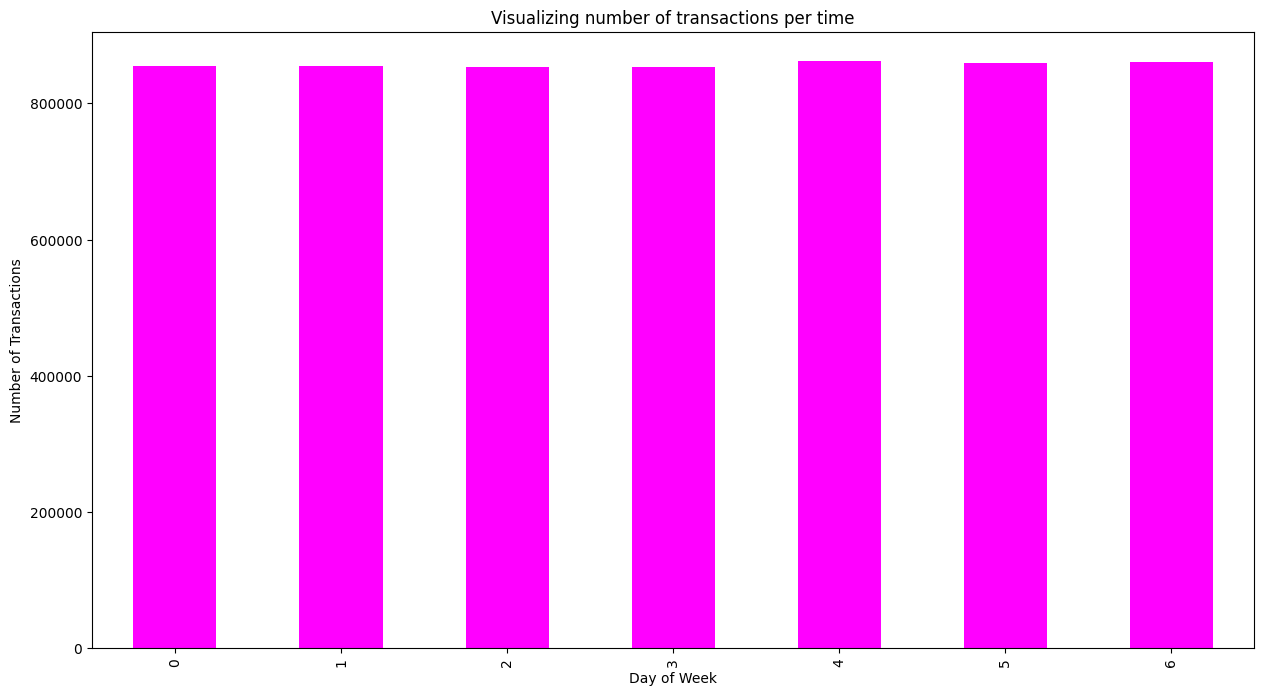

In [10]:
plt.figure(figsize=(15, 8))
df.groupby(df['day_of_week'])['Transaction ID'].count().plot(color = 'magenta',kind = 'bar')
plt.title('Visualizing number of transactions per time')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.show()

Question 9 : Will there be high transations on weekends?

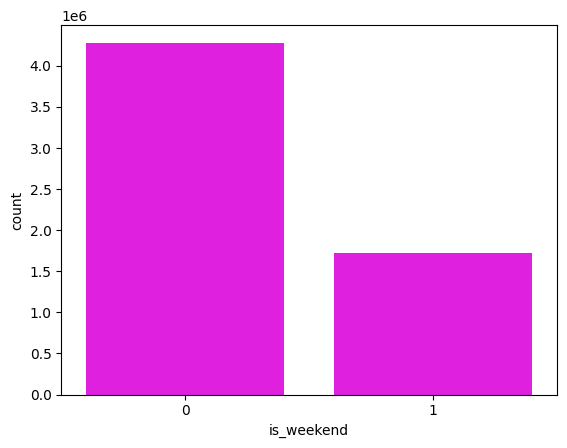

In [33]:
sns.countplot(x = 'is_weekend', data  = df,color= 'magenta');

Question 10 : Let's see if there are more fraudulent transactions on weekends or not

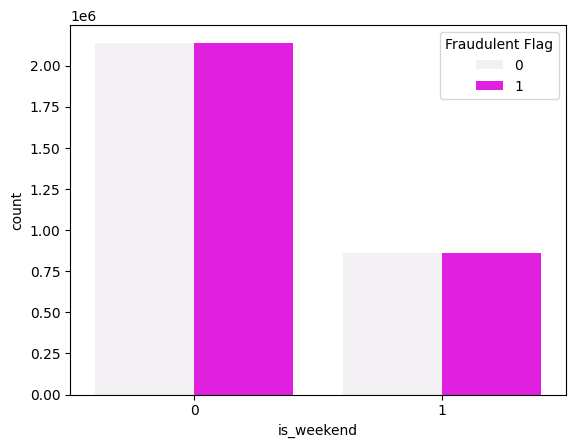

In [34]:

sns.countplot(x = 'is_weekend', hue = 'Fraudulent Flag', data  = df,color= 'magenta');

Even on weekends, it is hard to tell if there will be fraudulent transactions or not

Question 11 : What is the average amount that engineers spend


In [35]:
df[df['User Occupation'] == 'Engineer']['Transaction Amount'].mean()

499.71616667458756

Question 12 : What is the average amount that Artists spend


In [36]:
df[df['User Occupation'] == 'Artist']['Transaction Amount'].mean()

499.66784988343375

Question 13 : What is the average amount that users with safari browser spend?

In [37]:
df[df['Browser Type'] == 'Safari']['Transaction Amount'].mean()

500.83247578305884

Question 14 : What is the average amount that users with chrome browser spend?

In [38]:
df[df['Browser Type'] == 'Chrome']['Transaction Amount'].mean()

500.21780440824597

Question 15 : What is the average sum of transactions in December

In [39]:
df[df['month'] == 12]['Transaction Amount'].mean()

500.40900796131984

Question 16 : Which top 3 email types are used more in Nigeria for transactions?

In [40]:
df[df["User's Device Location"] == 'Nigeria']["User's Email Domain"].value_counts().sort_values(ascending = False).head(3)

zoho.co.uk      3890
live.com        3872
yandex.co.uk    3865
Name: User's Email Domain, dtype: int64

Question 17 : Which top 3 transaction authentication methods

In [41]:
df["Transaction Authentication Method"].value_counts().sort_values(ascending = False).head(3)

Geolocation Verification    154728
Behavioral Analytics        154416
SMS Code                    154397
Name: Transaction Authentication Method, dtype: int64

Question 18 : What are the top 3 major purposes of transactions

In [42]:
df["Transaction Purpose"].value_counts().sort_values(ascending = False).head(3)

Invoice Payment          158411
Dividend Reinvestment    158387
Donation to Nonprofit    158387
Name: Transaction Purpose, dtype: int64

Question 19 : What are the 3 most popular account status for these transactions

In [43]:
df["User Account Status"].value_counts().sort_values(ascending = False).head(3)

Trial       334960
Limited     334598
Verified    334485
Name: User Account Status, dtype: int64

Question 20 : What is the average income of users that use the company's product

In [44]:
df["User Income"].mean()

50493.27963754504

Question 21 : What are the top 5 occupations

In [45]:
df["User Occupation"].value_counts().sort_values(ascending = False).head(5)

Salesperson       231511
Engineer          231457
Lawyer            231353
Police Officer    231344
Plumber           231340
Name: User Occupation, dtype: int64

In [46]:
df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,year,month,day,hour,minute,day_of_week,day_of_year,is_weekend
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,Links,Tizen,Industrial & Scientific,68,Doctor,66826.21,Prefer Not to Say,Pro,In Transit,9.34,24.22,Daytime,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0,2023,1,2,7,47,0,2,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,Beaker,Windows Server,Beauty & Cosmetics,22,Chemist,89356.71,Genderqueer,Pending Approval,Resolved,65.28,55.11,Daytime,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1,2021,9,12,15,15,6,255,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,Opera,Android,Real Estate,71,Nurse,58438.63,Male,Pro,Posted,44.05,53.84,Daytime,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1,2023,1,12,17,25,3,12,0
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,Konqueror,CentOS,Appliances,78,Nurse,3426.92,Agender,Premium,Closed,21.70,21.62,Daytime,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1,2021,2,27,11,31,5,58,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,Basilisk,Ubuntu,Jewelry,31,Physicist,53080.12,Male,Free,Refunded,56.63,53.71,Daytime,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1,2022,9,24,4,6,5,267,1


Question 22 : Create a visusal plot showing the locations where the company operates

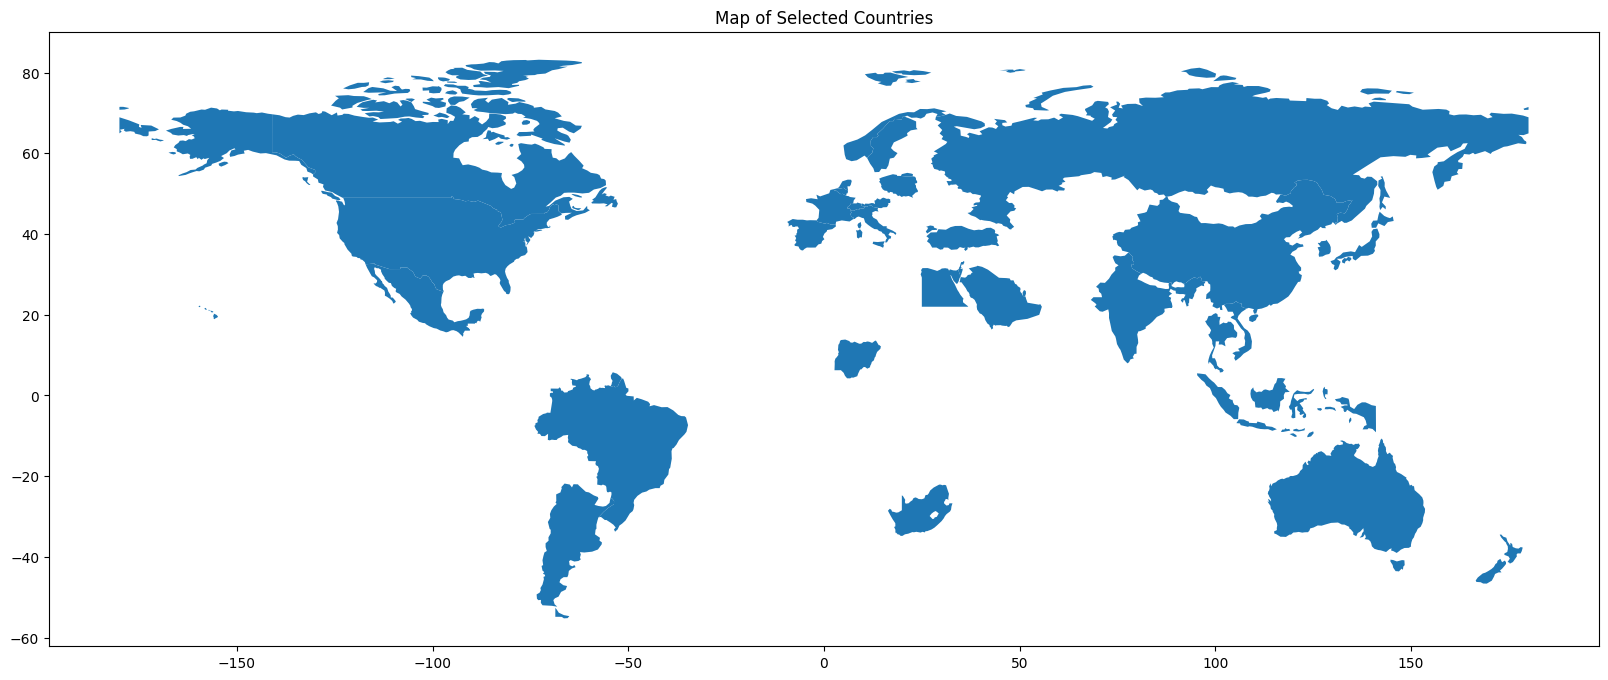

In [47]:

# Load a GeoDataFrame with world country geometries and country codes
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Define a list of country codes you want to plot
country_codes_to_plot = df['Country Code'].unique()

# Filter the GeoDataFrame to select the desired countries
selected_countries = world[world['iso_a3'].isin(country_codes_to_plot)]

# Set the figure size using plt.rcParams
plt.rcParams['figure.figsize'] = [20, 20]

# Plot the selected countries
selected_countries.plot()
plt.title('Map of Selected Countries')
plt.show()


## More Feature Engineering

In [48]:
df['mail_type'] = df["User's Email Domain"].str.split('.', expand = True)[0]

In [49]:
def classifying_business_age(x):
  if (x>0) & (x<=2):
    return 0
  elif (x>2) & (x<=7):
    return 1
  elif (x>7) & (x<=15):
    return 2
  elif (x>15) & (x<25):
    return 3
  elif (x>=25):
    return 4
  else:
    return -1

In [50]:
df['merchant class since operation'] = df["Merchant's Business Age"].apply(lambda x : classifying_business_age(x))

In [51]:
def classifying_reputation(x):
  if (x>0) & (x<=2):
    return 1
  elif (x==3):
    return 2
  elif (x>=4):
    return 3
  else:
    return -1

In [52]:
df['merchant_reputation_class'] = df["Merchant's Reputation Score"].apply(lambda x : classifying_reputation(x))

In [53]:
df = df.sort_values(by = ['User ID','Transaction Date and Time'])

In [ ]:
df.drop('date',axis=1,inplace = True)

In [54]:
df.to_csv('/content/drive/MyDrive/datafest_hackathon/data_after_feature_engineering.csv', index=False)